In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

import datetime
import operator
%matplotlib inline

In [2]:
# Project Topic/Title: Predicting Covid-19 cases for healthcare systems globally.

# Problem Statement: Covid-19 is a global pandemic that has caused great stress and 
#                    impacted the world in various ways. Most notably, it has placed 
#                    great stress on the healthcare systems worldwide.

# Motivation: There is a need to predict cases as accurately as possible 
#             so that the healthcare systems can better accommodate the 
#             necessary resources for treatment, enabling them to better cope.


In [3]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533


In [5]:
death_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716


In [6]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/25/21', '10/26/21', '10/27/21', '10/28/21', '10/29/21', '10/30/21',
       '10/31/21', '11/1/21', '11/2/21', '11/3/21'],
      dtype='object', length=656)

In [8]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,0,0,0,0,0,0,0,0,0,0,...,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323
1,0,0,0,0,0,0,0,0,0,0,...,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793
2,0,0,0,0,0,0,0,0,0,0,...,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754
3,0,0,0,0,0,0,0,0,0,0,...,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572
4,0,0,0,0,0,0,0,0,0,0,...,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533


In [9]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
230,0,1,3,3,4,5,7,7,10,13,...,175818,179095,184419,187851,192099,195211,198374,200844,204340,207975


In [10]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,0,0,0,0,0,0,0,0,0,0,...,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284
1,0,0,0,0,0,0,0,0,0,0,...,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940
2,0,0,0,0,0,0,0,0,0,0,...,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716


In [11]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [13]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(248093646,
 5021914,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126717,
  132519,
  146875,
  157974,
  169251,
  184036,
  200039,
  219595,
  246703,
  277579,
  309721,
  344828,
  387489,
  428574,
  479663,
  542525,
  607435,
  677100,
  734000,
  799279,
  876098,
  959098,
  1042125,
  1126354,
  1185448,
  1256304,
  1330214,
  1399820,
  1483141,
  1570148,
  1655435,
  1729825,
  1849397,
  1920450,
  2004357,
  2082578,
  2178264,
  2266302,
  2343474,
  2420249,
  2495798,
  2571854,
  2653236,
  2737234,
  2821349,
  2903700,
  2975267,
  3045514,
  3121393,
  3198418,
  3281836,
  

In [14]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [15]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126717],


In [16]:
singapore_cases

array([[     0],
       [     1],
       [     3],
       [     3],
       [     4],
       [     5],
       [     7],
       [     7],
       [    10],
       [    13],
       [    16],
       [    18],
       [    18],
       [    24],
       [    28],
       [    28],
       [    30],
       [    33],
       [    40],
       [    45],
       [    47],
       [    50],
       [    58],
       [    67],
       [    72],
       [    75],
       [    77],
       [    81],
       [    84],
       [    84],
       [    85],
       [    85],
       [    89],
       [    89],
       [    91],
       [    93],
       [    93],
       [    93],
       [   102],
       [   106],
       [   108],
       [   110],
       [   110],
       [   117],
       [   130],
       [   138],
       [   150],
       [   150],
       [   160],
       [   178],
       [   178],
       [   200],
       [   212],
       [   226],
       [   243],
       [   266],
       [   313],
       [   345],
       [   385

In [17]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [18]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [19]:
latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      156323
 1      186793
 2      206754
 3       15572
 4       64533
         ...  
 275    939463
 276    454509
 277      9810
 278    209781
 279    133091
 Name: 11/3/21, Length: 280, dtype: int64,
 0       7284
 1       2940
 2       5931
 3        130
 4       1716
        ...  
 275    22283
 276     4694
 277     1897
 278     3661
 279     4684
 Name: 11/3/21, Length: 280, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 260    0
 261    0
 262    0
 263    0
 264    0
 Name: 11/3/21, Length: 265, dtype: int64)

In [20]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [21]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [22]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 46252795 cases
India: 34321025 cases
Brazil: 21835785 cases
United Kingdom: 9215683 cases
Russia: 8494589 cases
Turkey: 8121196 cases
France: 7282823 cases
Iran: 5954962 cases
Argentina: 5292549 cases
Spain: 5019255 cases
Colombia: 5007099 cases
Italy: 4782802 cases
Germany: 4684462 cases
Indonesia: 4246174 cases
Mexico: 3811793 cases
Ukraine: 3118140 cases
Poland: 3045102 cases
South Africa: 2922735 cases
Philippines: 2793898 cases
Malaysia: 2486630 cases
Peru: 2203310 cases
Netherlands: 2196598 cases
Iraq: 2058914 cases
Thailand: 1935442 cases
Czechia: 1783227 cases
Canada: 1730818 cases
Japan: 1724128 cases
Chile: 1699427 cases
Romania: 1676293 cases
Bangladesh: 1570238 cases
Belgium: 1393358 cases
Israel: 1332247 cases
Pakistan: 1275158 cases
Sweden: 1175425 cases
Serbia: 1162482 cases
Portugal: 1092666 cases
Kazakhstan: 1024449 cases
Cuba: 953750 cases
Morocco: 946766 cases
Vietnam: 939463 cases
Switzerland: 881660 cases
Hungary: 879092 ca

In [23]:
# Find the list of unique provinces

# remove NaN
# unique_provinces =  list(confirmed_cases['Province/State'].unique())[1:]
unique_provinces =  list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

In [24]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for case in no_cases:
    unique_provinces.remove(case)

In [25]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 1816 cases
New South Wales: 76073 cases
Northern Territory: 226 cases
Queensland: 2092 cases
South Australia: 918 cases
Tasmania: 237 cases
Victoria: 93339 cases
Western Australia: 1112 cases
Alberta: 325001 cases
British Columbia: 207120 cases
Grand Princess: 13 cases
Manitoba: 63931 cases
New Brunswick: 6576 cases
Newfoundland and Labrador: 1995 cases
Northwest Territories: 1887 cases
Nova Scotia: 7462 cases
Nunavut: 674 cases
Ontario: 609308 cases
Prince Edward Island: 319 cases
Quebec: 427471 cases
Repatriated Travellers: 13 cases
Saskatchewan: 78075 cases
Yukon: 973 cases
Anhui: 1008 cases
Beijing: 1173 cases
Chongqing: 609 cases
Fujian: 1308 cases
Gansu: 329 cases
Guangdong: 3233 cases
Guangxi: 346 cases
Guizhou: 158 cases
Hainan: 190 cases
Hebei: 1375 cases
Heilongjiang: 1902 cases
Henan: 1562 cases
Hong Kong: 12352 cases
Hubei: 68309 cases
Hunan: 1197 cases
Inner Mongolia: 608 cases
Jiangsu: 1603 cases
Jiangxi: 943 cases
Jilin: 579 cases
Liaoning: 

In [26]:
# handling nan values if there is any

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

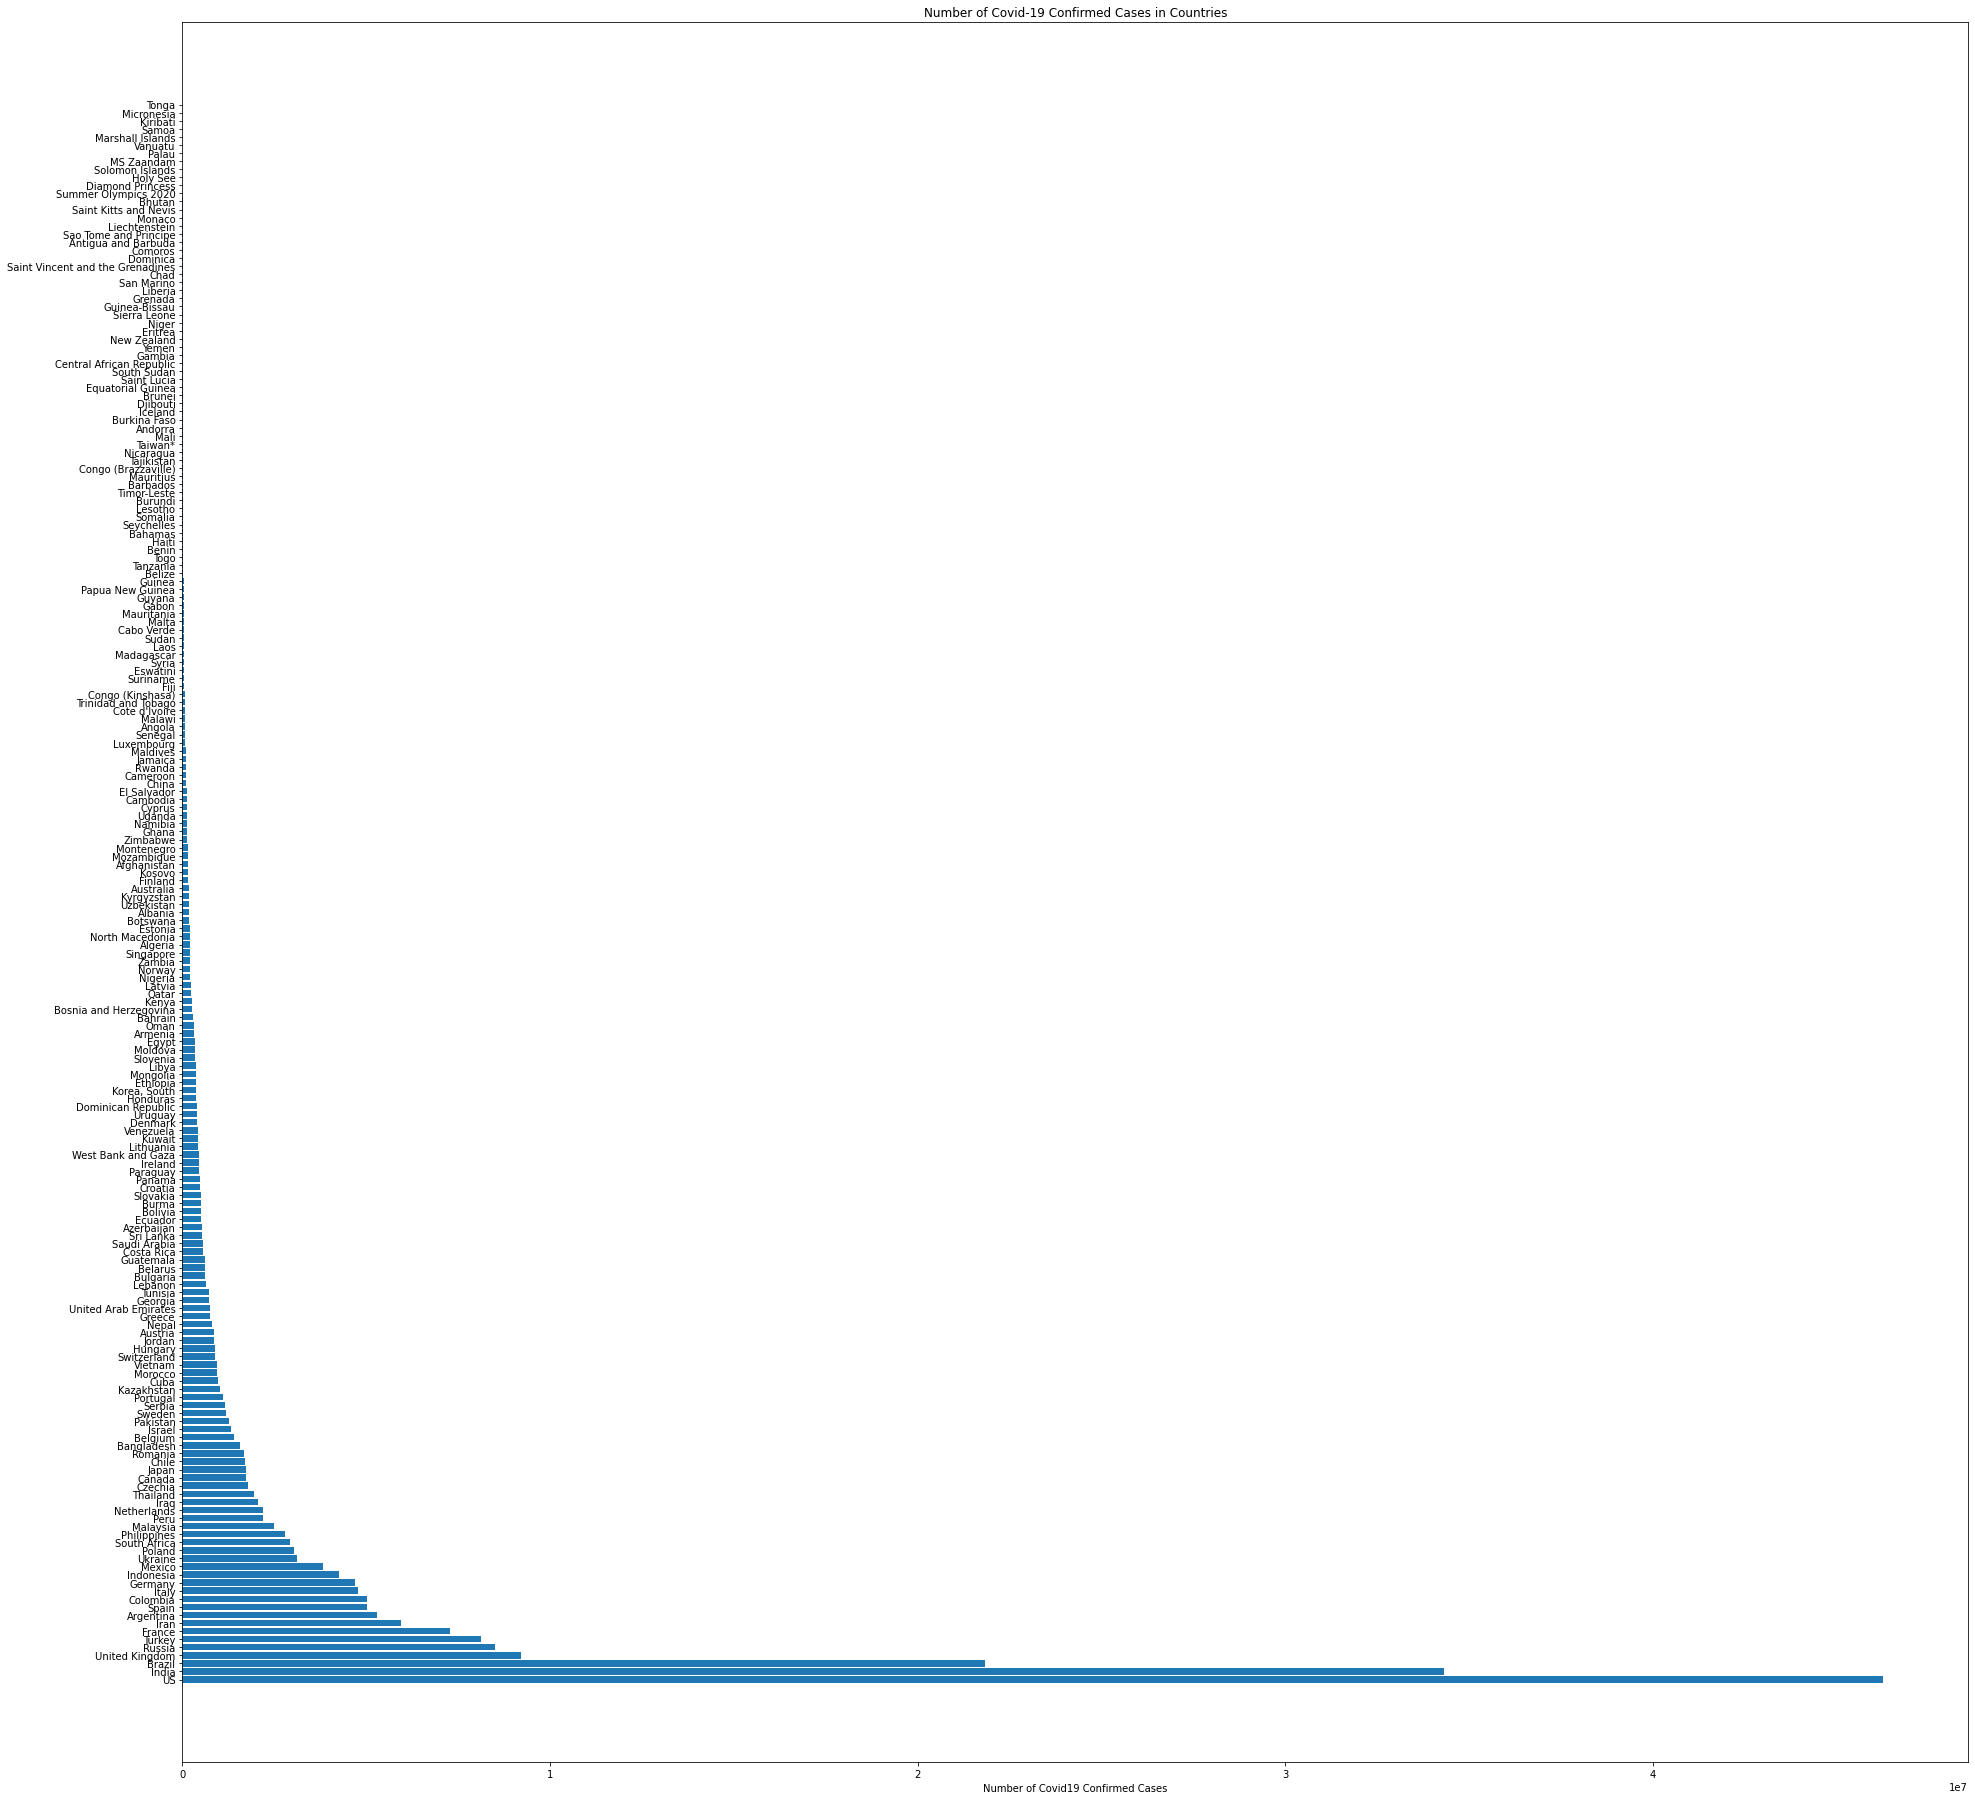

In [27]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [28]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

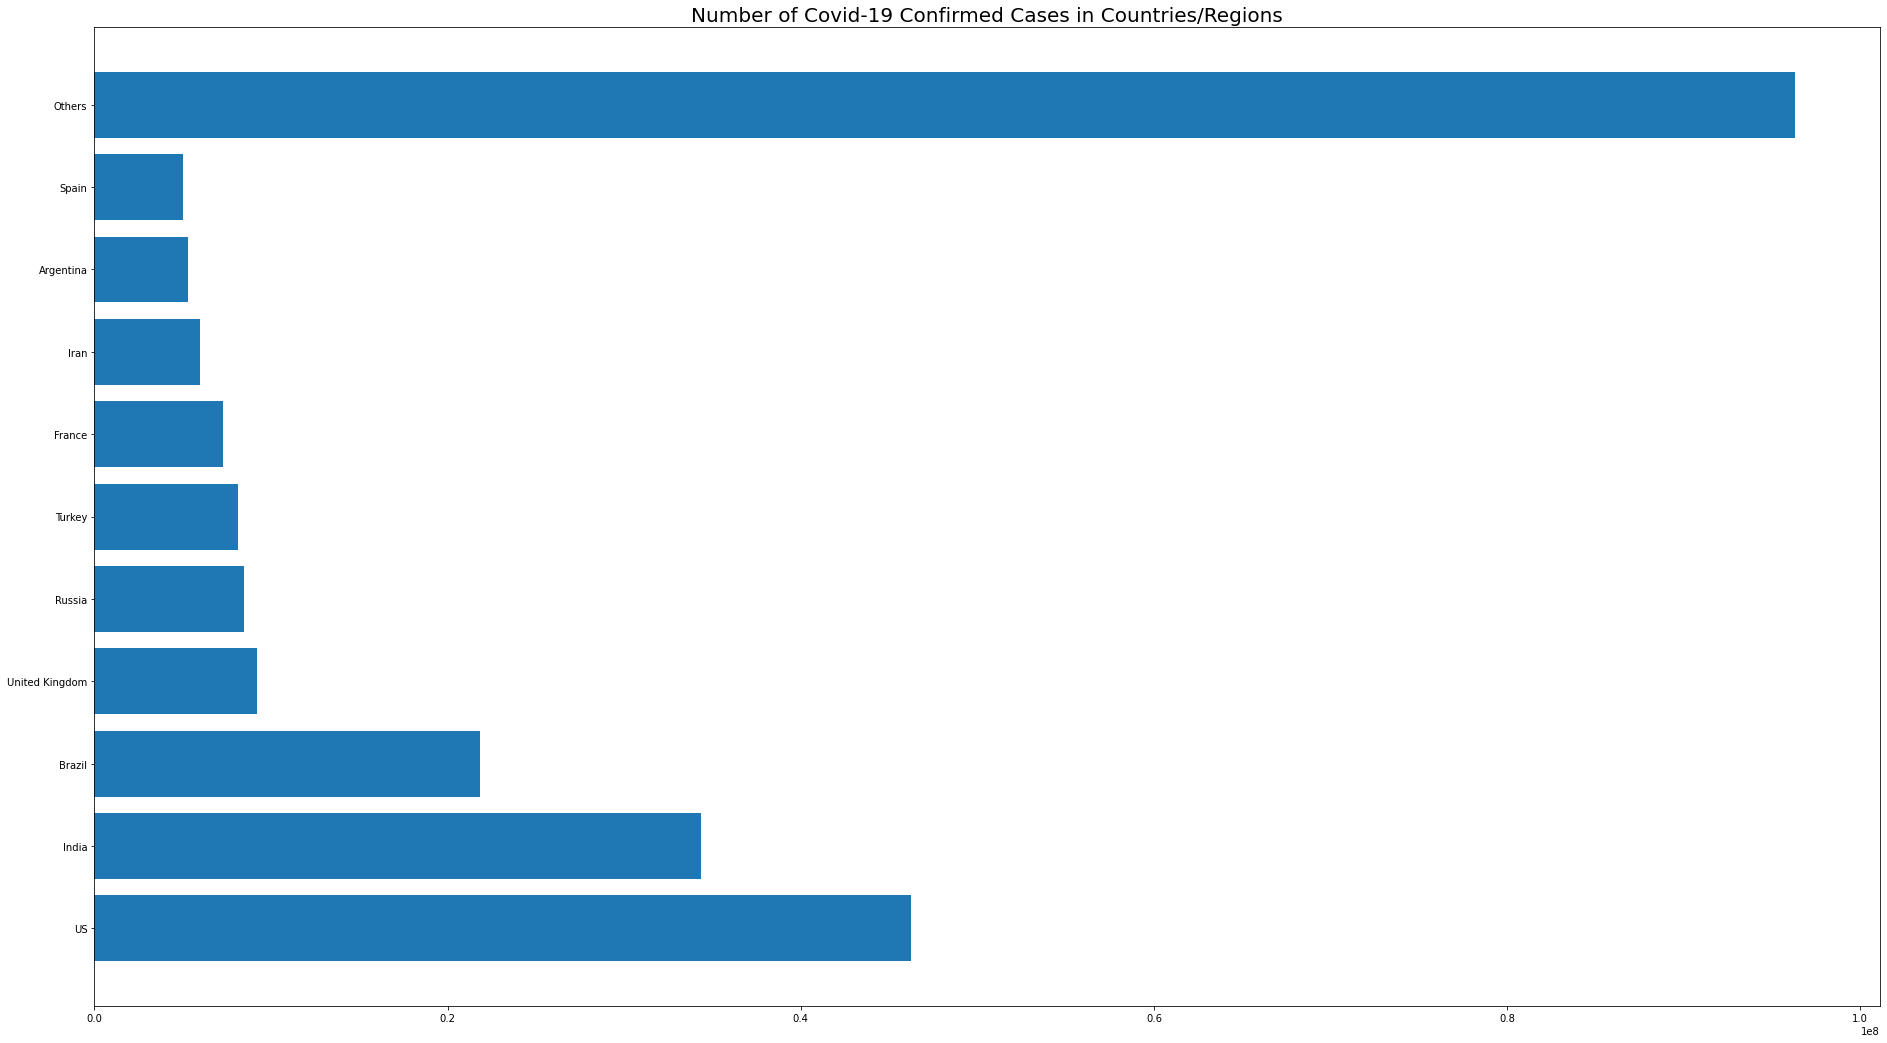

In [29]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

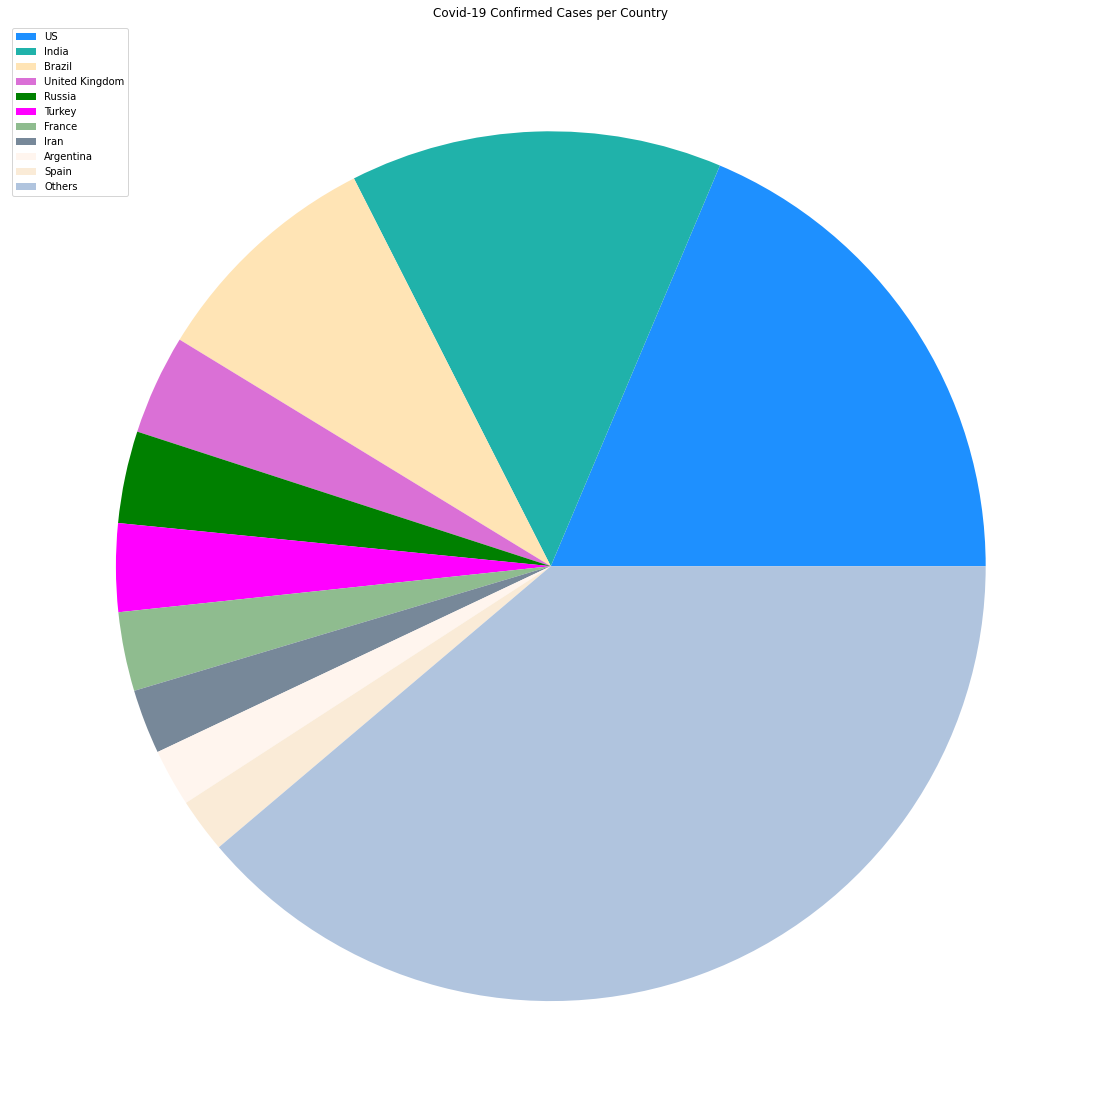

In [30]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [31]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

**Decision Tree Regressor**

Adjust hyper-parameters to find the most generalised model: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [32]:
X_train, X_test, y_train, y_test = train_test_split(days_since_1_22, world_cases.ravel(), test_size = 0.2, random_state = 42)


In [33]:
dtr_base = DecisionTreeRegressor()
dtr_base.fit(X_train,y_train)

y_pred = dtr_base.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred) 
train_adjusted_r2 = 1 - (1-dtr_base.score(X_train, y_train)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-dtr_base.score(X_test, y_test)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
rsq = r2_score(y_test,y_pred)
print("Prediction Score:", dtr_base.score(X_test, y_test))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared score for train:', dtr_base.score(X_train, y_train))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', dtr_base.score(X_test, y_test))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(dtr_base, days_since_1_22, world_cases.ravel(), cv=KFold(n_splits=5, shuffle=True, random_state=42))), 4))

Prediction Score: 0.9999742884513759
MAE: 361860.4503816794
MSE: 191805122623.80917
RMSE: 437955.61718490283
R-squared score for train: 1.0
Adjusted R-squared score for train: 1.0
R-squared score for test: 0.9999742884513759
Adjusted R-squared score for test: 0.9999742488951473
Cross Validation Score: 1.0


Finding Best Params

In [34]:

dtr = DecisionTreeRegressor(
            criterion= "squared_error"
        )

distributions = {
    "criterion":["mse","friedman_mse","mae","poisson"],
    "max_depth":[x for x in range(1,10)],
    "min_samples_split": [x for x in range(1,20)],
    "min_samples_leaf": [x for x in range(1,20)]
}

clf = RandomizedSearchCV(dtr,distributions,random_state=42)
search = clf.fit(X_train, y_train)
search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

{'min_samples_split': 15,
 'min_samples_leaf': 7,
 'max_depth': 9,
 'criterion': 'friedman_mse'}

In [35]:
dtr_best = DecisionTreeRegressor(
        criterion="friedman_mse",
        min_samples_leaf=7,
        min_samples_split=15,
        max_depth=9
        )
dtr_best.fit(X_train,y_train)

y_pred = dtr_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred) 
train_adjusted_r2 = 1 - (1-dtr_best.score(X_train, y_train)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-dtr_best.score(X_test, y_test)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
rsq = r2_score(y_test,y_pred)
print("Prediction Score:", dtr_best.score(X_test, y_test))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared score for train:', dtr_best.score(X_train, y_train))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', dtr_best.score(X_test, y_test))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(dtr_best, days_since_1_22, world_cases.ravel(), cv=KFold(n_splits=5, shuffle=True, random_state=42))), 4))


Prediction Score: 0.9995529121959268
MAE: 1302702.5376822955
MSE: 3335222328983.378
RMSE: 1826259.107844059
R-squared score for train: 0.9996344603670387
Adjusted R-squared score for train: 0.9996338979983727
R-squared score for test: 0.9995529121959268
Adjusted R-squared score for test: 0.9995522243685359
Cross Validation Score: 0.9993
